<a href="https://colab.research.google.com/github/gregorimaia/Engenharia_Aeroespacial/blob/main/Sistemas_de_Controle_Ajuste_de_Curva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Trabalho Final de Sistemas de Controle I



Ganho K = 7.80


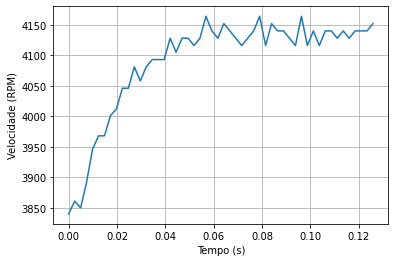

In [10]:
#Resultados experimentais iniciando em t = 0
u1 = 400;
u2 = 440; #degrau ocorreu em 0.024 s

tempo = np.linspace(0,0.126,52);

y = np.array([ 3840, 3861, 3850, 3892,
              3946, 3968, 3968, 4001, 4012, 4046, 4046, 4081,
              4058, 4081, 4093, 4093, 4093, 4128, 4105, 4128,
              4128, 4116, 4128, 4164, 4140, 4128, 4152, 4140,
              4128, 4116, 4128, 4140, 4164, 4116, 4152, 4140,
              4140, 4128, 4116, 4164, 4116, 4140, 4116, 4140,
              4140, 4128, 4140, 4128, 4140, 4140, 4140, 4152]);


plt.plot(tempo,y);
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (RPM)')
plt.grid()
#plt.title('Saída y para degrau de -0.1 na entrada, iniciando em t = 0.024 s')

#Ganho:
K = (y[-1]-y[0])/(u2-u1)
print(f'Ganho K = {K:.2f}')

In [ ]:
#Resultados experimentais a partir do impulso
u1 = 400;
u2 = 440; #degrau ocorreu em 0.024 s

tempo = np.linspace(0.026,0.126,51);

y = np.array([3861,3850,3892,3946,3968,3968,4001,4012,4046,
              4046,4081,4058,4081,4093,4093,4093,4128,4105,4128,
              4128,4116,4128,4164,4140,4128,4152,4140,4128,4116,
              4128,4140,4164,4116,4152,4140,4140,4128,4116,4164,
              4116,4140,4116,4140,4140,4128,4140,4128,4140,4140,4140,4152,]);


plt.plot(tempo,y);
plt.grid()
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (RPM)')
#plt.title('Saída y para degrau de -0.1 na entrada, iniciando em t = 0.024 s')

#Ganho:
K = (y[-1]-y[0])/(u2-u1)
print(f'Ganho K = {K:.2f}')

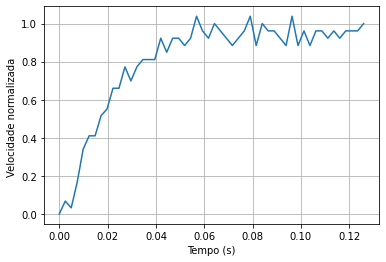

In [11]:
#Remoção do offset e normalização da resposta de saída 
y_norm = (y-y[0])/(y[-1]-y[0])   #
plt.plot(tempo,y_norm);
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade normalizada ')
plt.grid()
#plt.title('Saída normalizada, com degrau na entrada iniciando em t = 0.5 s')

Tau = 0.023018864526655903


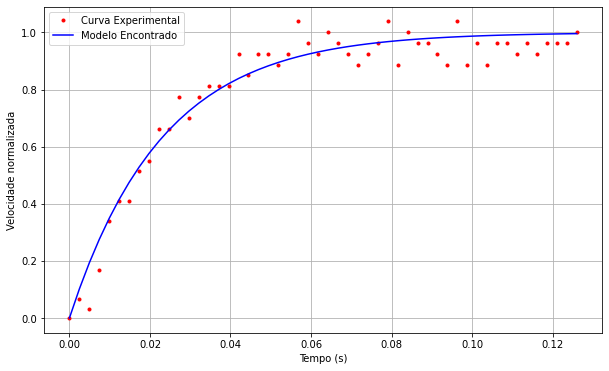

In [13]:
from scipy.optimize import curve_fit
from scipy.signal import TransferFunction, step

def resposta_tempo_superamortecida(t, tau1):
  G = TransferFunction(1,[tau1, 1])
  t, yout = step(G, T=t)
  return yout

#remover parcela de atraso (resposta inicia no índice 48):
#tempo1 = tempo[48:]-tempo[48]   #tempo iniciando em 0
#y_norm1 = y_norm[48:]

y_norm = (y-y[0])/(y[-1]-y[0]) 
popt, pcov = curve_fit(resposta_tempo_superamortecida, tempo, y_norm)
tau1= popt[0]   #resultado 1

G = TransferFunction(1,[tau1, 1])  #modelo superamortecido
#print(f'Resultados do modelo encontrado:\ntau1 = {tau1:.6f}\t tau2 = {tau2:.6f}\n')

t, y_modelo = step(G, T=tempo)  #resposta no tempo do modelo
plt.figure(figsize=(10,6))
plt.plot(tempo, y_norm,'r.', tempo, y_modelo,'b');  #comparação com experimental
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade normalizada')
plt.grid()
#plt.title('Resultados empregando ajuste de curvas')
plt.legend(('Curva Experimental','Modelo Encontrado'));
print('Tau =', tau1)

In [14]:
from scipy.signal import tf2ss

A, B, C, D = tf2ss(K,[tau1, 1]);

print('A =', A)
print('B =', B)
print('C =', C)
print('D =', D)

A = [[-43.44262936]]
B = [[1.]]
C = [[338.85250904]]
D = [[0.]]
